In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt

In [3]:
import numpy as np
from numpy import ma
import pandas as pd 
import xray

### reads in the `old` dataset: GEFS 2.5 degree

In [4]:
dset_old = xray.open_dataset('../data/ensemble/gep20_t06z_pgrb2af384_2_2015121606.nc')

In [5]:
dset_old

<xray.Dataset>
Dimensions:                 (lat_0: 73, lon_0: 144, lv_ISBL0: 2)
Coordinates:
  * lon_0                   (lon_0) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 ...
  * lat_0                   (lat_0) float32 90.0 87.5 85.0 82.5 80.0 77.5 ...
  * lv_ISBL0                (lv_ISBL0) float32 50000.0 100000.0
Data variables:
    APCP_P11_L1_GLL0_acc6h  (lat_0, lon_0) float64 0.0 0.0 0.0 0.0 0.0 0.0 ...
    HGT_P1_L100_GLL0        (lv_ISBL0, lat_0, lon_0) float64 5.123e+03 ...
    PRMSL_P1_L101_GLL0      (lat_0, lon_0) float64 1.032e+05 1.032e+05 ...
    VGRD_P1_L103_GLL0       (lat_0, lon_0) float64 -4.08 -3.92 -3.75 -3.57 ...
    VGRD_P1_L100_GLL0       (lat_0, lon_0) float64 -4.76 -4.29 -3.81 -3.32 ...
    UGRD_P1_L103_GLL0       (lat_0, lon_0) float64 -3.66 -3.83 -4.0 -4.16 ...
    UGRD_P1_L100_GLL0       (lat_0, lon_0) float64 -10.74 -10.94 -11.12 ...
    TMP_P1_L103_GLL0        (lat_0, lon_0) float64 241.1 241.1 241.1 241.1 ...
    TMP_P1_L100_GLL0        (lat_0, lon_0) float64

### reads in the `new` dataset: GEFS 0.5 degree

In [6]:
dset_new = xray.open_dataset('../data/ensemble_0p5/gep20.t06z.pgrb2a.0p50.f384.nc')

In [7]:
dset_new

<xray.Dataset>
Dimensions:               (forecast_time0: 1, lat_0: 361, lon_0: 720, lv_ISBL0: 2)
Coordinates:
  * forecast_time0        (forecast_time0) timedelta64[ns] 16 days
  * lv_ISBL0              (lv_ISBL0) float32 85000.0 100000.0
  * lon_0                 (lon_0) float32 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 ...
  * lat_0                 (lat_0) float32 90.0 89.5 89.0 88.5 88.0 87.5 87.0 ...
Data variables:
    APCP_P11_L1_GLL0_acc  (forecast_time0, lat_0, lon_0) float64 0.0 0.0 0.0 ...
    HGT_P1_L100_GLL0      (forecast_time0, lv_ISBL0, lat_0, lon_0) float64 1.41e+03 ...
    PRMSL_P1_L101_GLL0    (forecast_time0, lat_0, lon_0) float64 1.032e+05 ...
    VGRD_P1_L103_GLL0     (forecast_time0, lat_0, lon_0) float64 -4.08 -4.05 ...
    VGRD_P1_L100_GLL0     (forecast_time0, lv_ISBL0, lat_0, lon_0) float64 -4.76 ...
    UGRD_P1_L103_GLL0     (forecast_time0, lat_0, lon_0) float64 -3.66 -3.69 ...
    UGRD_P1_L100_GLL0     (forecast_time0, lv_ISBL0, lat_0, lon_0) float64 -10.74 ...
    

### The variables (`HGT_P1_L100_GLL0`, `VGRD_P1_L100_GLL0`, `UGRD_P1_L100_GLL0` and `TMP_P1_L100_GLL0`) in the new GEFS download are defined over 2 levels: 850 hPa and 1000 hPa  

<br>


In [8]:
iso_new = dset_new['lv_ISBL0']; print(iso_new)

<xray.DataArray 'lv_ISBL0' (lv_ISBL0: 2)>
array([  85000.,  100000.], dtype=float32)
Coordinates:
  * lv_ISBL0  (lv_ISBL0) float32 85000.0 100000.0
Attributes:
    units: Pa
    long_name: Isobaric surface


### in the old GEFS download, only the variable `HGT_P1_L100_GLL0` is defined over 2 levels: 500 and 1000 hPa

The rest of the variables correspond respectively: 

+ PRMSL_P1_L101_GLL0: 'mslp'

+ UGRD_P1_L103_GLL0: 'u10m'
+ UGRD_P1_L100_GLL0: 'u850'

+ VGRD_P1_L103_GLL0: 'v10m'
+ VGRD_P1_L100_GLL0: 'v850'

+ TMP_P1_L103_GLL0: 't2m'
+ TMP_P1_L100_GLL0: 't850'

+ APCP_P11_L1_GLL0_acc6h: 'precip'

In [9]:
iso_old = dset_old['lv_ISBL0']; print(iso_old)

<xray.DataArray 'lv_ISBL0' (lv_ISBL0: 2)>
array([  50000.,  100000.], dtype=float32)
Coordinates:
  * lv_ISBL0  (lv_ISBL0) float32 50000.0 100000.0
Attributes:
    units: Pa
    long_name: Isobaric surface
    standard_name: air_pressure


### comparison of the T850 fields in the new and old GEFS

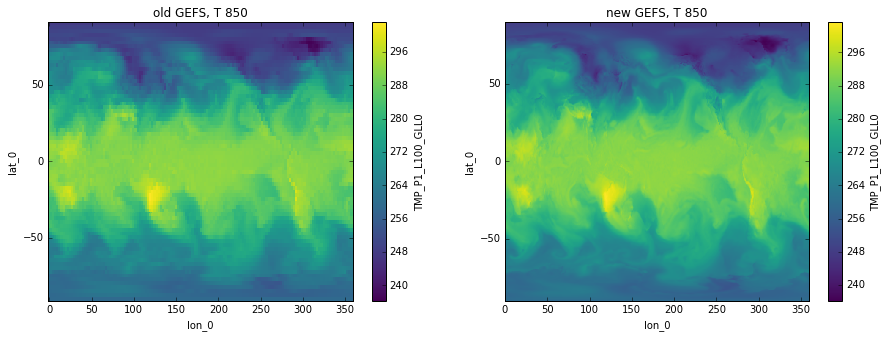

In [10]:
f, axes = plt.subplots(ncols=2, figsize=(15,5))
dset_old['TMP_P1_L100_GLL0'].plot(ax=axes[0])
axes[0].set_title('old GEFS, T 850')
dset_new['TMP_P1_L100_GLL0'][0,0,:,:].plot(ax=axes[1])
axes[1].set_title('new GEFS, T 850');

### comparison of the HGT 1000 fields in the new and old GEFS

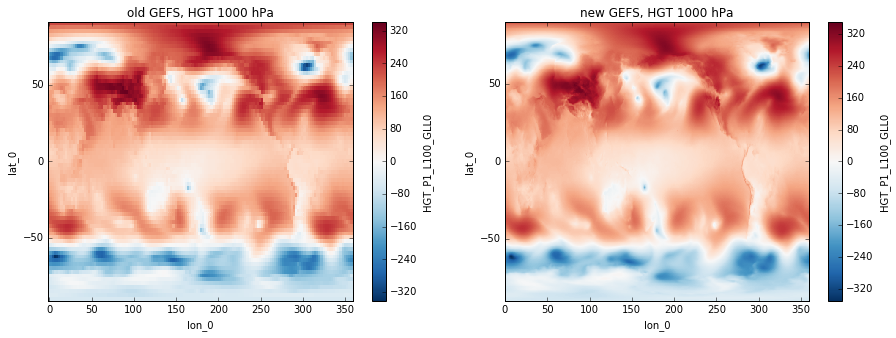

In [11]:
f, axes = plt.subplots(ncols=2, figsize=(15,5))
dset_old['HGT_P1_L100_GLL0'][1,:,:].plot(ax=axes[0])
axes[0].set_title('old GEFS, HGT 1000 hPa')

dset_new['HGT_P1_L100_GLL0'][0,1,:,:].plot(ax=axes[1])
axes[1].set_title('new GEFS, HGT 1000 hPa');

### comparison of the HGT 500 field in the old GEFS and HGT 850 in the new GEFS

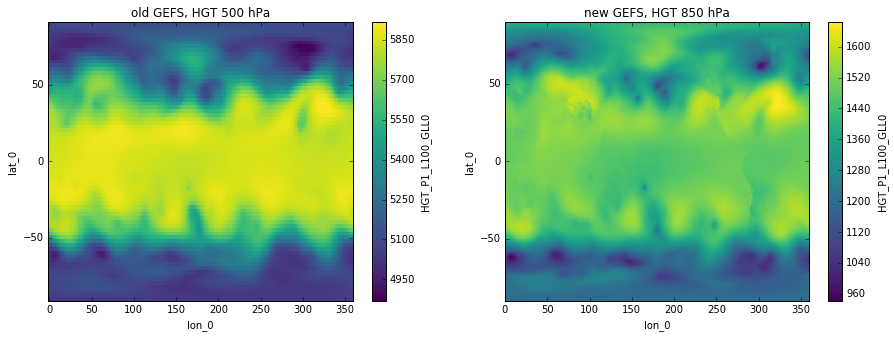

In [12]:
f, axes = plt.subplots(ncols=2, figsize=(15,5))
dset_old['HGT_P1_L100_GLL0'][0,:,:].plot(ax=axes[0])
axes[0].set_title('old GEFS, HGT 500 hPa')

dset_new['HGT_P1_L100_GLL0'][0,0,:,:].plot(ax=axes[1])
axes[1].set_title('new GEFS, HGT 850 hPa');

### set up interpolation

In [13]:
from mpl_toolkits.basemap import interp

In [14]:
xin = dset_new.lon_0.data
yin = dset_new.lat_0.data[::-1]

In [15]:
xout = dset_old.lon_0.data
yout = dset_old.lat_0.data[::-1]

In [16]:
xout, yout = np.meshgrid(xout, yout)

In [17]:
def interp_var(dset, varname = 'HGT_P1_L100_GLL0', level_hPa=None):
    mat = dset_new[varname].sel(lv_ISBL0=level_hPa*100).squeeze()
    mat = mat.data[::-1,:]
    mat_interp = interp(mat,xin,yin,xout,yout)
    mat_interp = mat_interp[::-1,:]
    if level_hPa: 
        mat_interp = mat_interp[np.newaxis,...]
    return mat_interp

In [18]:
h1000_interp = interp_var(dset_new, varname='HGT_P1_L100_GLL0', level_hPa=1000.)

In [19]:
h850_interp = interp_var(dset_new, varname='HGT_P1_L100_GLL0', level_hPa=850.)

In [20]:
hgt = np.concatenate((h850_interp, h1000_interp), axis=0)

### update HGT in the old GEFS with the interpolated HGT fields from the new GEFS

In [21]:
dset_old.update({'HGT_P1_L100_GLL0': (['lv_ISBL0','lat_0','lon_0'], hgt)}, inplace=True)

<xray.Dataset>
Dimensions:                 (lat_0: 73, lon_0: 144, lv_ISBL0: 2)
Coordinates:
  * lon_0                   (lon_0) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 ...
  * lat_0                   (lat_0) float32 90.0 87.5 85.0 82.5 80.0 77.5 ...
  * lv_ISBL0                (lv_ISBL0) float32 50000.0 100000.0
Data variables:
    APCP_P11_L1_GLL0_acc6h  (lat_0, lon_0) float64 0.0 0.0 0.0 0.0 0.0 0.0 ...
    HGT_P1_L100_GLL0        (lv_ISBL0, lat_0, lon_0) float64 1.41e+03 ...
    PRMSL_P1_L101_GLL0      (lat_0, lon_0) float64 1.032e+05 1.032e+05 ...
    VGRD_P1_L103_GLL0       (lat_0, lon_0) float64 -4.08 -3.92 -3.75 -3.57 ...
    VGRD_P1_L100_GLL0       (lat_0, lon_0) float64 -4.76 -4.29 -3.81 -3.32 ...
    UGRD_P1_L103_GLL0       (lat_0, lon_0) float64 -3.66 -3.83 -4.0 -4.16 ...
    UGRD_P1_L100_GLL0       (lat_0, lon_0) float64 -10.74 -10.94 -11.12 ...
    TMP_P1_L103_GLL0        (lat_0, lon_0) float64 241.1 241.1 241.1 241.1 ...
    TMP_P1_L100_GLL0        (lat_0, lon_0) float64 

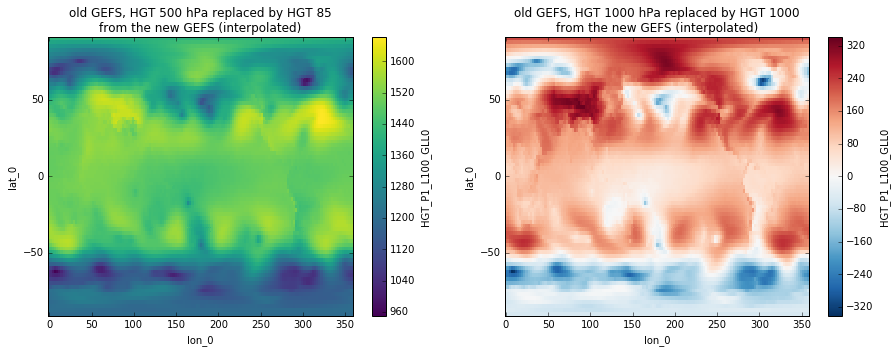

In [27]:
f, axes = plt.subplots(ncols=2, figsize=(15,5))
dset_old['HGT_P1_L100_GLL0'][0,:,:].plot(ax=axes[0])
axes[0].set_title('old GEFS, HGT 500 hPa replaced by HGT 85\nfrom the new GEFS (interpolated)')

dset_old['HGT_P1_L100_GLL0'][1,:,:].plot(ax=axes[1])
axes[1].set_title('old GEFS, HGT 1000 hPa replaced by HGT 1000\nfrom the new GEFS (interpolated)');

In [23]:
dset_new.close()
dset_old.close()

In [28]:
!jupyter nbconvert convert_GEFS.ipynb

[NbConvertApp] Converting notebook convert_GEFS.ipynb to html
[NbConvertApp] Writing 790137 bytes to convert_GEFS.html
